/var/folders/ln/_pmwztk951qbwbcq9zjqjj0c0000gn/T/ipykernel_11015/1762464985.py:67: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  study_group_avg = df.groupby('study_category')['average_score'].mean()


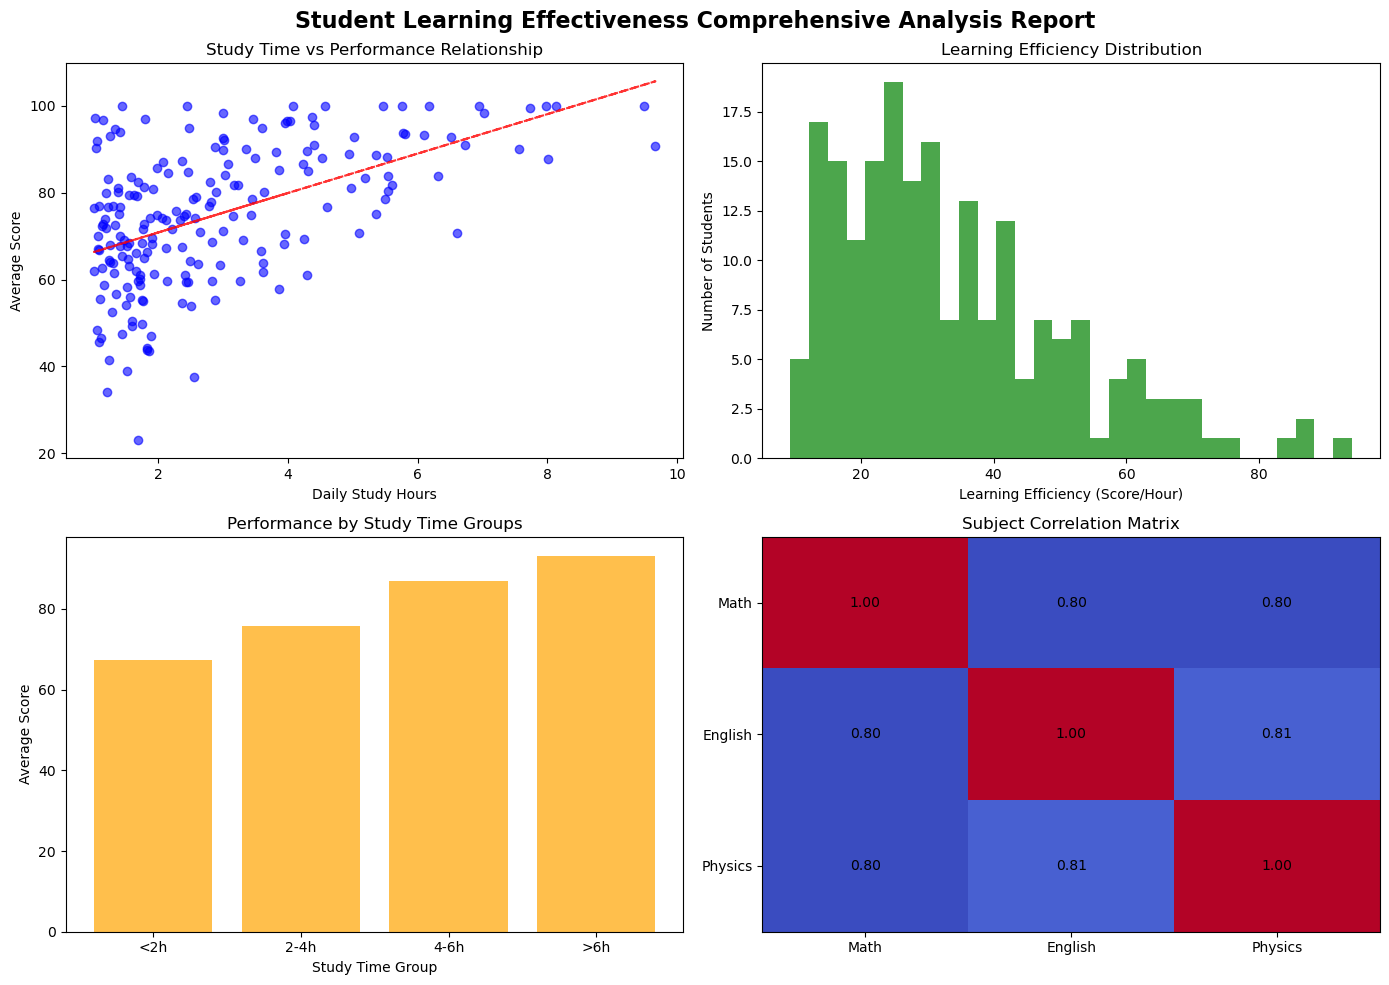

=== Data Analysis Results ===
1. Correlation between study time and performance: 0.519
2. Average learning efficiency: 33.95 points/hour
3. Most efficient student ID: 172
4. Average scores by subject: Math 74.2, English 76.6, Physics 73.8


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Project Goal: Analyze student performance data and provide teaching recommendations

# Step 1: Data Preparation (NumPy)
np.random.seed(42)
n_students = 200

# Simulate complex data: considering the impact of study time
study_hours = np.random.exponential(2, n_students) + 1  # Study time (hours/day)
base_ability = np.random.normal(0, 1, n_students)       # Basic ability

# Scores related to study time and basic ability
math_scores = 60 + 15 * base_ability + 5 * study_hours + np.random.normal(0, 8, n_students)
english_scores = 65 + 12 * base_ability + 4 * study_hours + np.random.normal(0, 7, n_students)
physics_scores = 55 + 18 * base_ability + 6 * study_hours + np.random.normal(0, 10, n_students)

# Ensure scores are within reasonable range
math_scores = np.clip(math_scores, 0, 100)
english_scores = np.clip(english_scores, 0, 100)
physics_scores = np.clip(physics_scores, 0, 100)

# Step 2: Data Processing (Pandas)
df = pd.DataFrame({
    'student_id': range(1, n_students + 1),
    'study_hours': study_hours,
    'math': math_scores,
    'english': english_scores,
    'physics': physics_scores
})

# Data analysis
df['total_score'] = df[['math', 'english', 'physics']].sum(axis=1)
df['average_score'] = df['total_score'] / 3

# Learning efficiency analysis
df['efficiency'] = df['average_score'] / df['study_hours']

# Step 3: Visualization Analysis (Matplotlib)
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Student Learning Effectiveness Comprehensive Analysis Report', fontsize=16, fontweight='bold')

# Analysis 1: Relationship between study time and performance
axes[0, 0].scatter(df['study_hours'], df['average_score'], alpha=0.6, color='blue')
axes[0, 0].set_xlabel('Daily Study Hours')
axes[0, 0].set_ylabel('Average Score')
axes[0, 0].set_title('Study Time vs Performance Relationship')

# Add trend line
z = np.polyfit(df['study_hours'], df['average_score'], 1)
p = np.poly1d(z)
axes[0, 0].plot(df['study_hours'], p(df['study_hours']), "r--", alpha=0.8)

# Analysis 2: Learning efficiency distribution
axes[0, 1].hist(df['efficiency'], bins=30, alpha=0.7, color='green')
axes[0, 1].set_xlabel('Learning Efficiency (Score/Hour)')
axes[0, 1].set_ylabel('Number of Students')
axes[0, 1].set_title('Learning Efficiency Distribution')

# Analysis 3: Performance comparison across different study time groups
df['study_category'] = pd.cut(df['study_hours'],
                             bins=[0, 2, 4, 6, float('inf')],
                             labels=['<2h', '2-4h', '4-6h', '>6h'])

study_group_avg = df.groupby('study_category')['average_score'].mean()
axes[1, 0].bar(study_group_avg.index, study_group_avg.values, alpha=0.7, color='orange')
axes[1, 0].set_xlabel('Study Time Group')
axes[1, 0].set_ylabel('Average Score')
axes[1, 0].set_title('Performance by Study Time Groups')

# Analysis 4: Subject correlation heatmap
import matplotlib.colors as mcolors

corr_matrix = df[['math', 'english', 'physics']].corr()
im = axes[1, 1].imshow(corr_matrix, cmap='coolwarm', aspect='auto')
axes[1, 1].set_xticks(range(len(corr_matrix.columns)))
axes[1, 1].set_yticks(range(len(corr_matrix.columns)))
axes[1, 1].set_xticklabels(['Math', 'English', 'Physics'])
axes[1, 1].set_yticklabels(['Math', 'English', 'Physics'])
axes[1, 1].set_title('Subject Correlation Matrix')

# Add numerical labels
for i in range(len(corr_matrix.columns)):
    for j in range(len(corr_matrix.columns)):
        text = axes[1, 1].text(j, i, f'{corr_matrix.iloc[i, j]:.2f}',
                              ha="center", va="center", color="black")

plt.tight_layout()
plt.show()

# Output key insights
print("=== Data Analysis Results ===")
print(f"1. Correlation between study time and performance: {df['study_hours'].corr(df['average_score']):.3f}")
print(f"2. Average learning efficiency: {df['efficiency'].mean():.2f} points/hour")
print(f"3. Most efficient student ID: {df.loc[df['efficiency'].idxmax(), 'student_id']}")
print(f"4. Average scores by subject: Math {df['math'].mean():.1f}, English {df['english'].mean():.1f}, Physics {df['physics'].mean():.1f}")